In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/california_housing_train.csv')
df


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

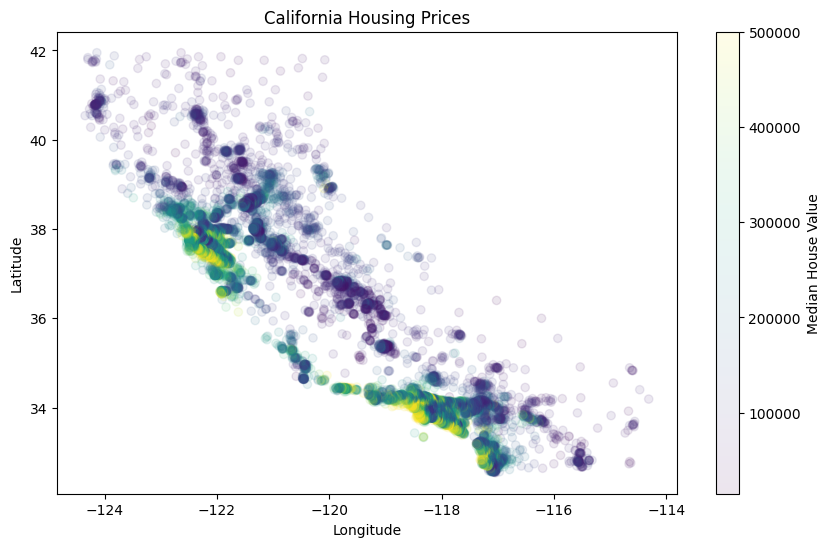

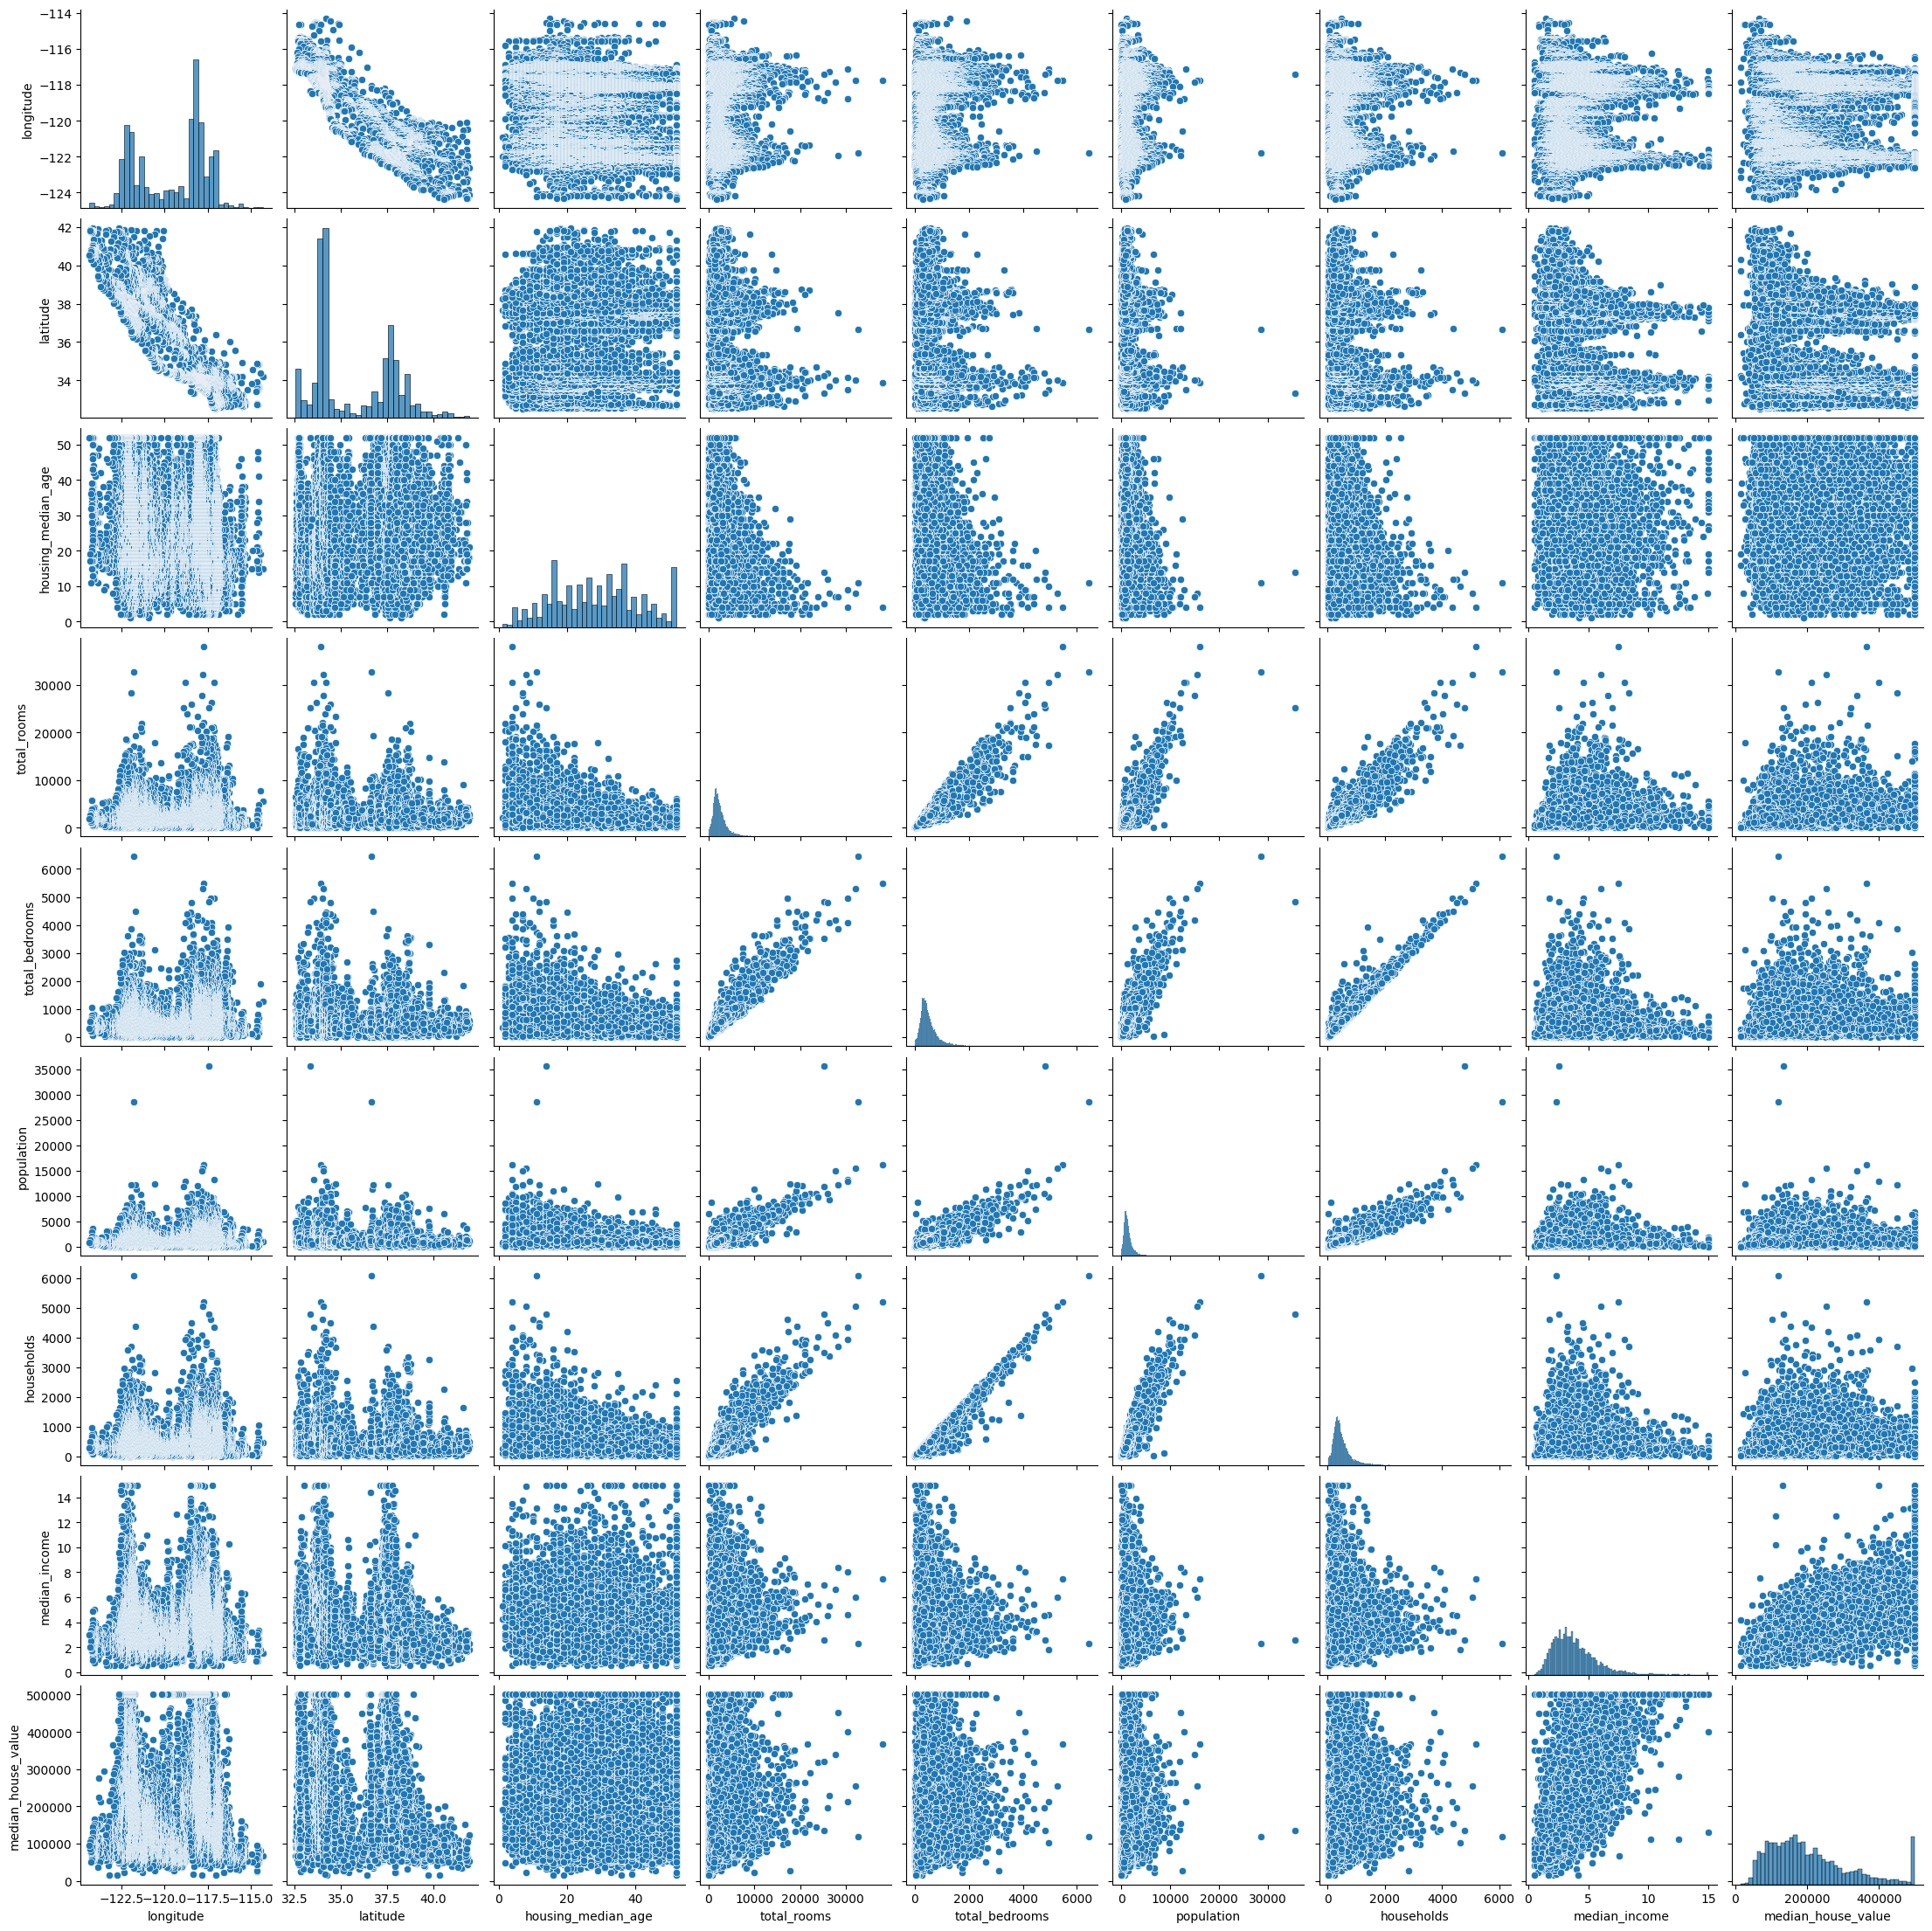

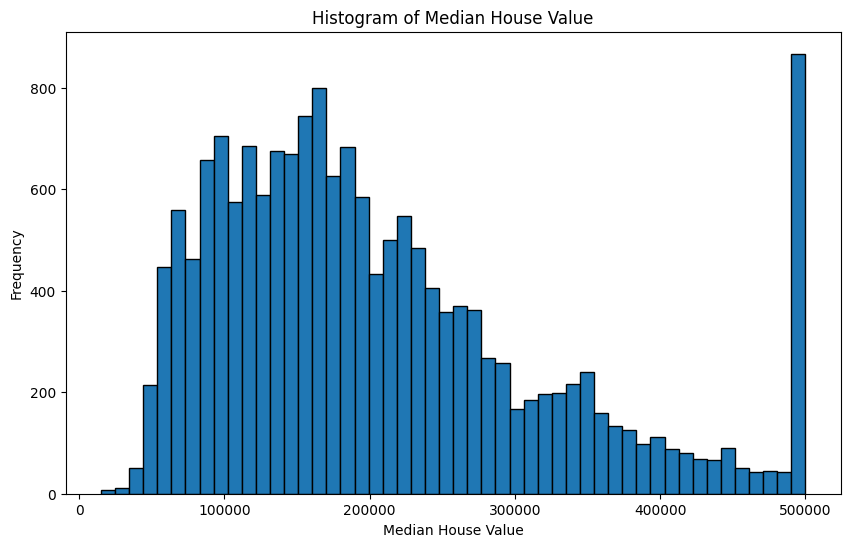

In [3]:
#visualization
import matplotlib.pyplot as plt
# import sns
import seaborn as sns

plt.figure(figsize=(10, 6)) # size of the plot
plt.scatter(df['longitude'], df['latitude'], alpha=0.1, c=df['median_house_value'], cmap='viridis') # scatter plot
plt.colorbar(label='Median House Value') # color bar
plt.xlabel('Longitude') # x label
plt.ylabel('Latitude') # y label
plt.title('California Housing Prices') # title
plt.show() # show the plot

#correlation matrix
df.corr()

#pairplot
sns.pairplot(df)
plt.show()

#histogram
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50, edgecolor='k')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value')
plt.show()

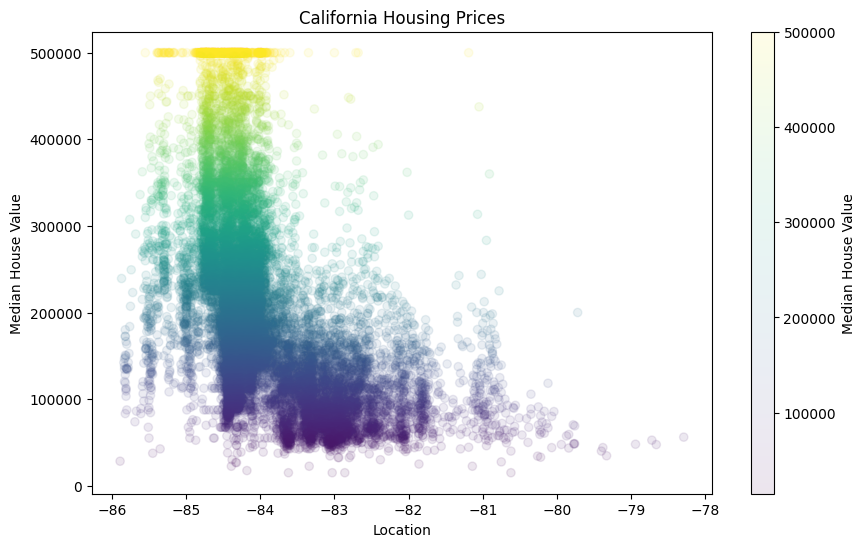

In [4]:
# could you create a new column that combines the longitude and latitude into a single column?
df['location'] = df['longitude'] + df['latitude']
df

# could you create a new column that combines the longitude and latitude into a single column?
df['location'] = df['longitude'] + df['latitude']
df

# could you create an correlation between the median_house_value and the location?
df.corr()

# could you create an scatter plot between the median_house_value and the location?
plt.figure(figsize=(10, 6))
plt.scatter(df['location'], df['median_house_value'], alpha=0.1, c=df['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Location')
plt.ylabel('Median House Value')
plt.title('California Housing Prices')
plt.show()



In [5]:

!pip install geohash2




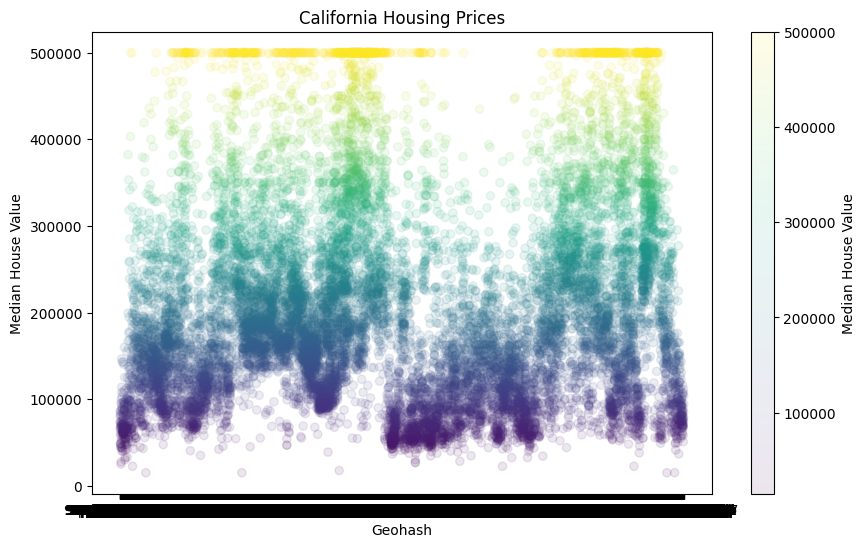

In [6]:
import geohash2
df['geohash'] = df.apply(lambda x: geohash2.encode(x.latitude, x.longitude), axis=1)

# could you create an scatter plot between the median_house_value and the geohash?
plt.figure(figsize=(10, 6))
plt.scatter(df['geohash'], df['median_house_value'], alpha=0.1, c=df['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Geohash')
plt.ylabel('Median House Value')
plt.title('California Housing Prices')
plt.show()



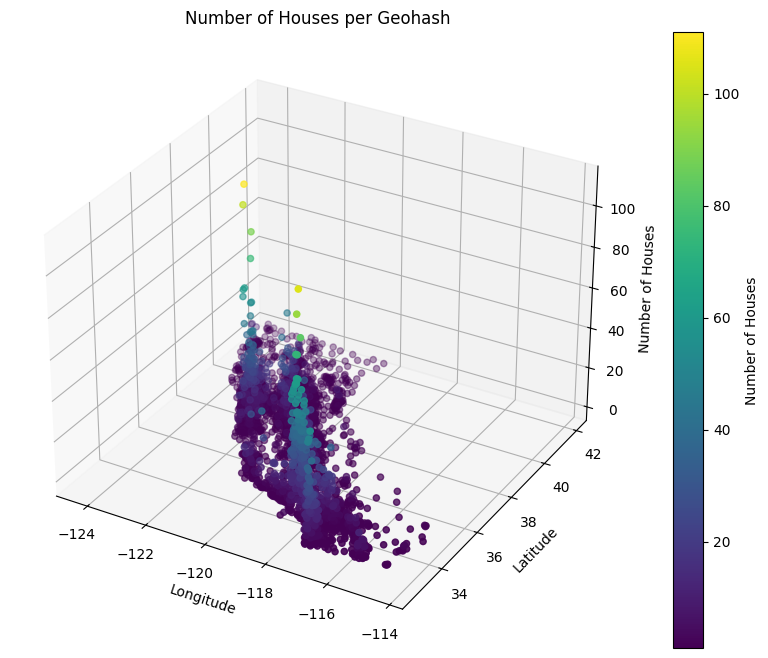

In [7]:
# Install and import the necessary library
!pip install python-geohash

import geohash  # Note: This is the python-geohash library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reset the geohash column if it has been created before
if 'geohash' in df.columns:
    df.drop(columns=['geohash'], inplace=True)

# Encode latitude and longitude into geohash codes
df['geohash'] = df.apply(lambda x: geohash.encode(x['latitude'], x['longitude'], precision=5), axis=1)

# Group the data by geohash and count the number of houses per geohash
geohash_counts = df.groupby('geohash').size().reset_index(name='count')

# Decode geohash to get latitude and longitude
def decode_geohash(gh):
    lat, lon, lat_err, lon_err = geohash.decode_exactly(gh)
    return pd.Series({'latitude': lat, 'longitude': lon})

geohash_counts[['latitude', 'longitude']] = geohash_counts['geohash'].apply(decode_geohash)

# Ensure no NaN values exist
geohash_counts.dropna(subset=['latitude', 'longitude', 'count'], inplace=True)

# Convert data types to float
geohash_counts['latitude'] = geohash_counts['latitude'].astype(float)
geohash_counts['longitude'] = geohash_counts['longitude'].astype(float)
geohash_counts['count'] = geohash_counts['count'].astype(int)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    geohash_counts['longitude'], 
    geohash_counts['latitude'], 
    geohash_counts['count'],
    c=geohash_counts['count'], 
    cmap='viridis', 
    depthshade=True
)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number of Houses')
ax.set_title('Number of Houses per Geohash')

fig.colorbar(sc, ax=ax, label='Number of Houses')

plt.show()

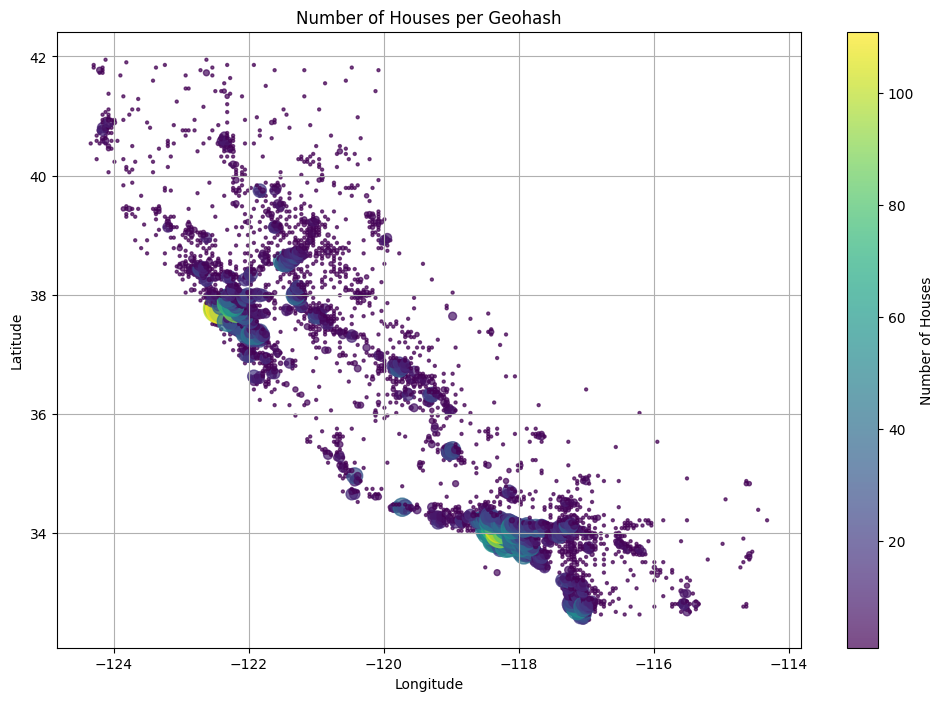

In [8]:
# Cell [6]: Visualize the number of houses per geohash in a 2D plot

# Plot the counts per geohash on a 2D scatter plot
plt.figure(figsize=(12, 8))

# Scale the sizes for better visibility
sizes = geohash_counts['count'] / geohash_counts['count'].max() * 500  # Adjust the scaling factor as needed

# Create a scatter plot of longitude vs latitude with sizes and colors based on counts
scatter = plt.scatter(
    geohash_counts['longitude'],
    geohash_counts['latitude'],
    s=sizes,
    c=geohash_counts['count'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Number of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of Houses per Geohash')
plt.grid(True)

plt.show()

Reset All and start again

In [9]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/california_housing_train.csv')

# Display the first few rows of the dataset
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

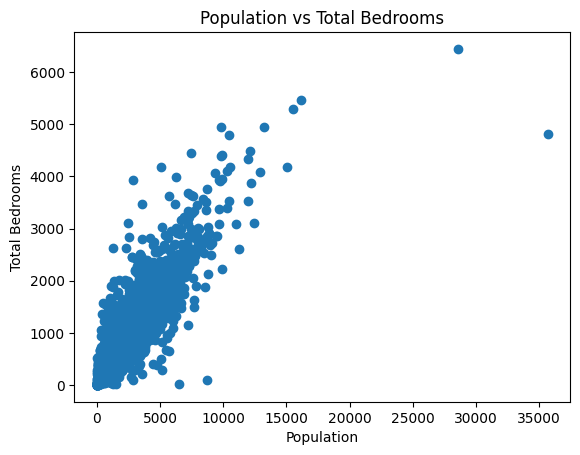

In [10]:
import matplotlib.pyplot as plt

pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.title('Population vs Total Bedrooms')
plt.show()

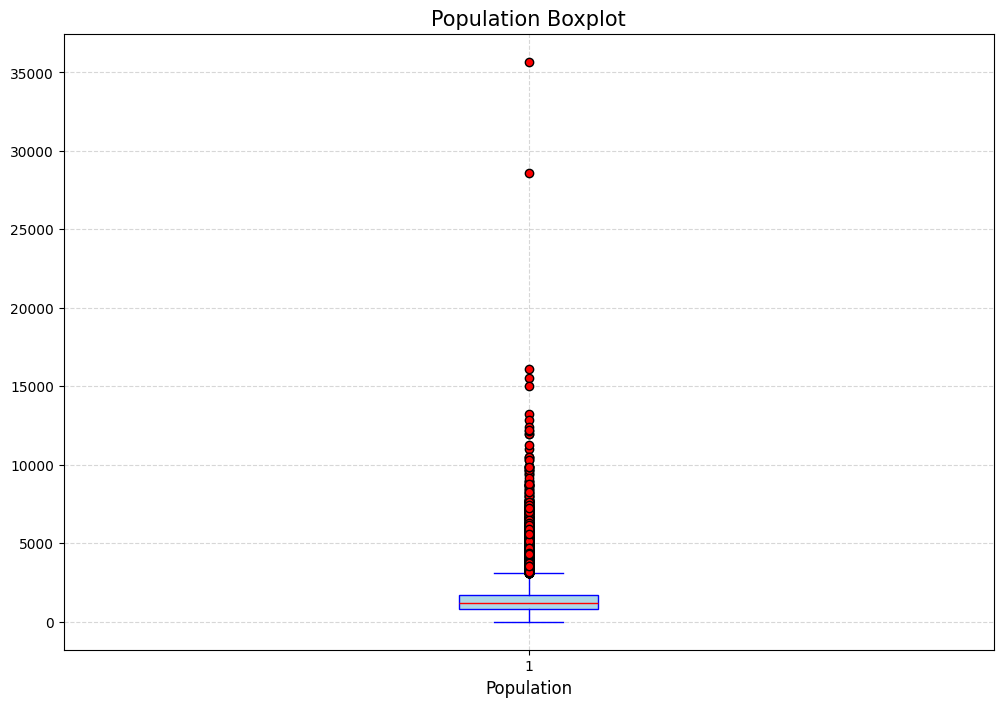

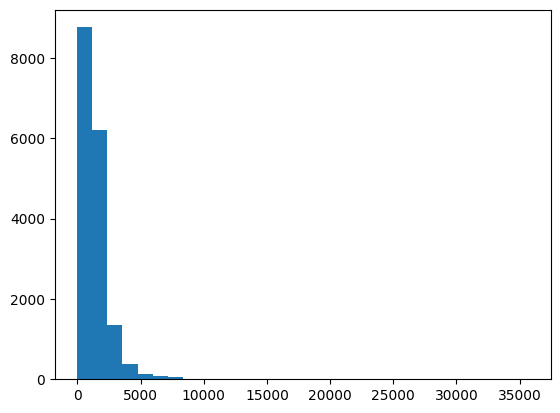

In [11]:
# boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(pop, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'), 
            medianprops=dict(color='red'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Population Boxplot', fontsize=15)
plt.xlabel('Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# histogram
plt.hist(pop, bins=30)
plt.show()

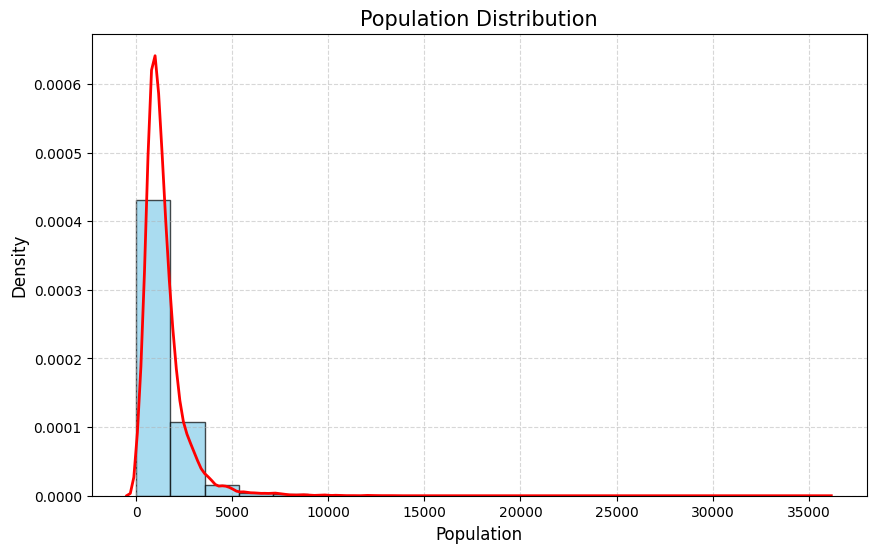

In [12]:
import seaborn as sns
# density plot and histogram
plt.figure(figsize=(10, 6))
plt.hist(pop, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
sns.kdeplot(pop, color='red', linewidth=2)
plt.title('Population Distribution', fontsize=15)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [13]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

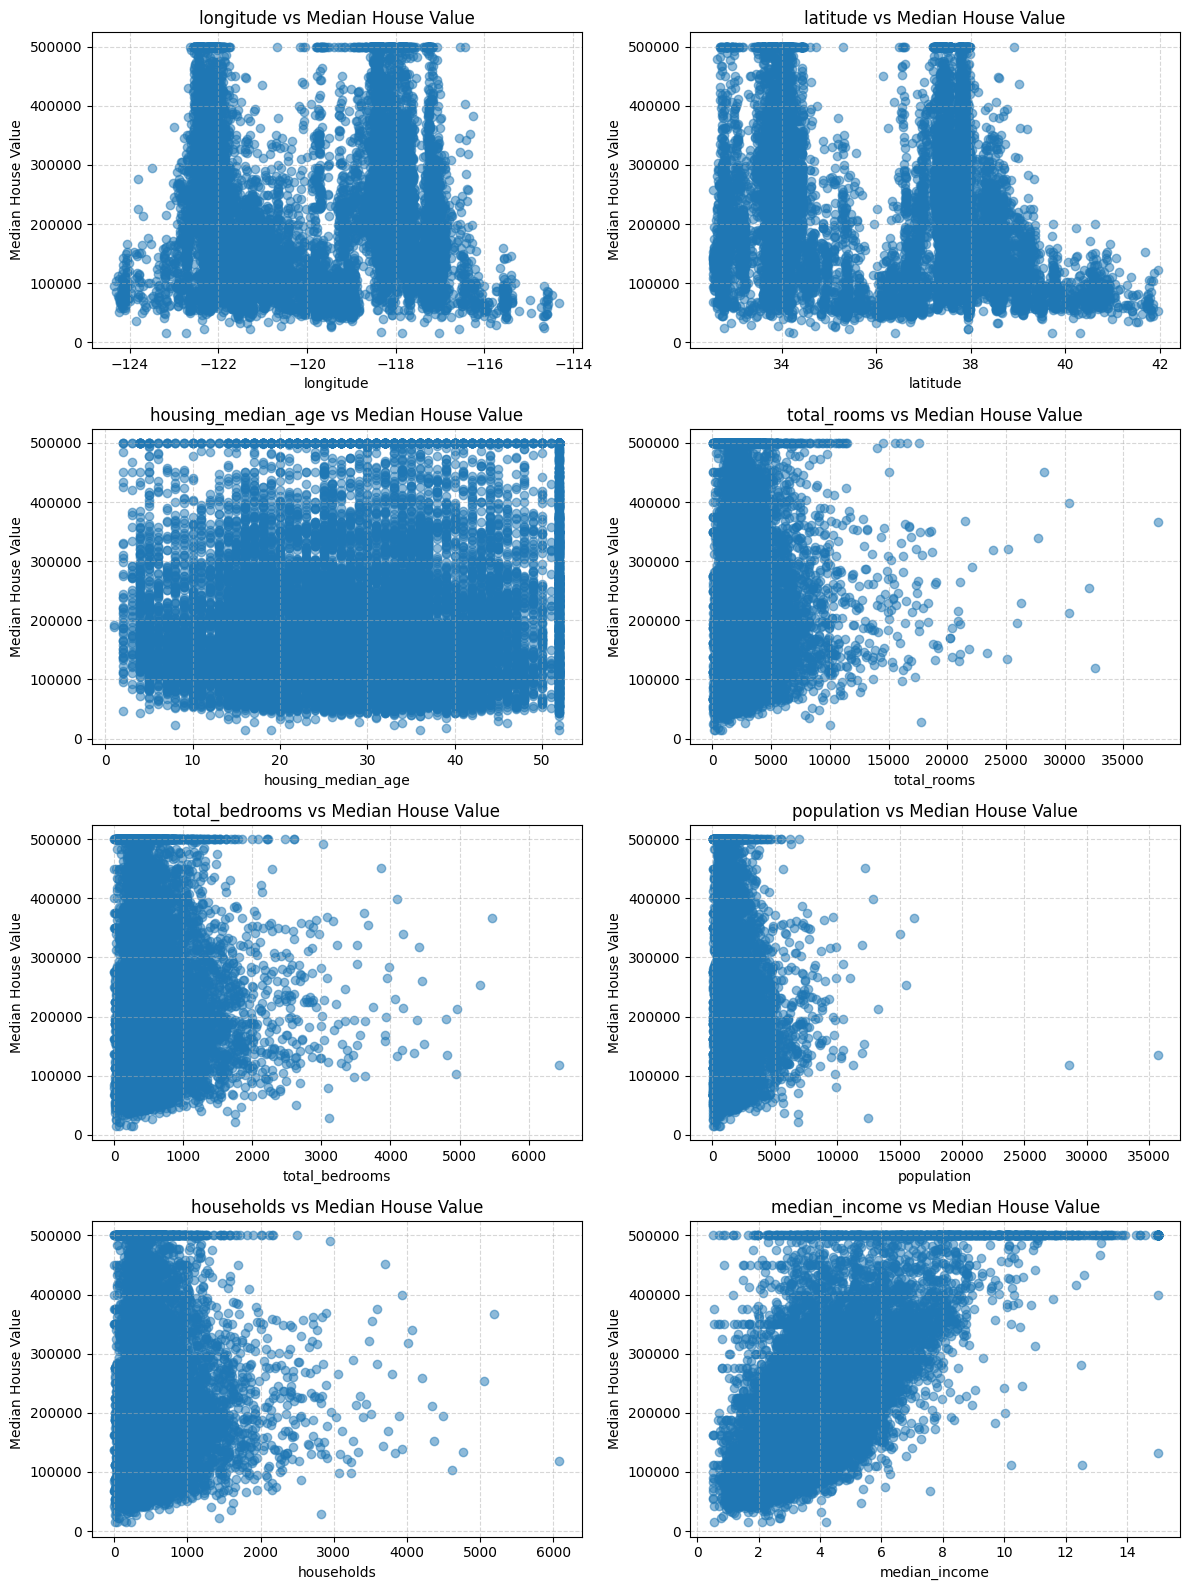

In [19]:
# median house value is the target variable
# could you creat a scatter plote between all the features and the target variable?
import matplotlib.pyplot as plt
import math

# Calculate the number of features (excluding 'median_house_value')
num_features = len(df.columns) - 1
num_rows = math.ceil(num_features / 2)  # Two plots per row

plt.figure(figsize=(12, num_rows * 4))  # Dynamically adjust figure size

subplot_idx = 1  # Keep track of subplot index
for feature in df.columns:
    if feature == 'median_house_value':
        continue  # Skip the target variable
    
    plt.subplot(num_rows, 2, subplot_idx)  # Create subplots dynamically
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5)
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    subplot_idx += 1  # Increment subplot index

plt.tight_layout()
plt.show()


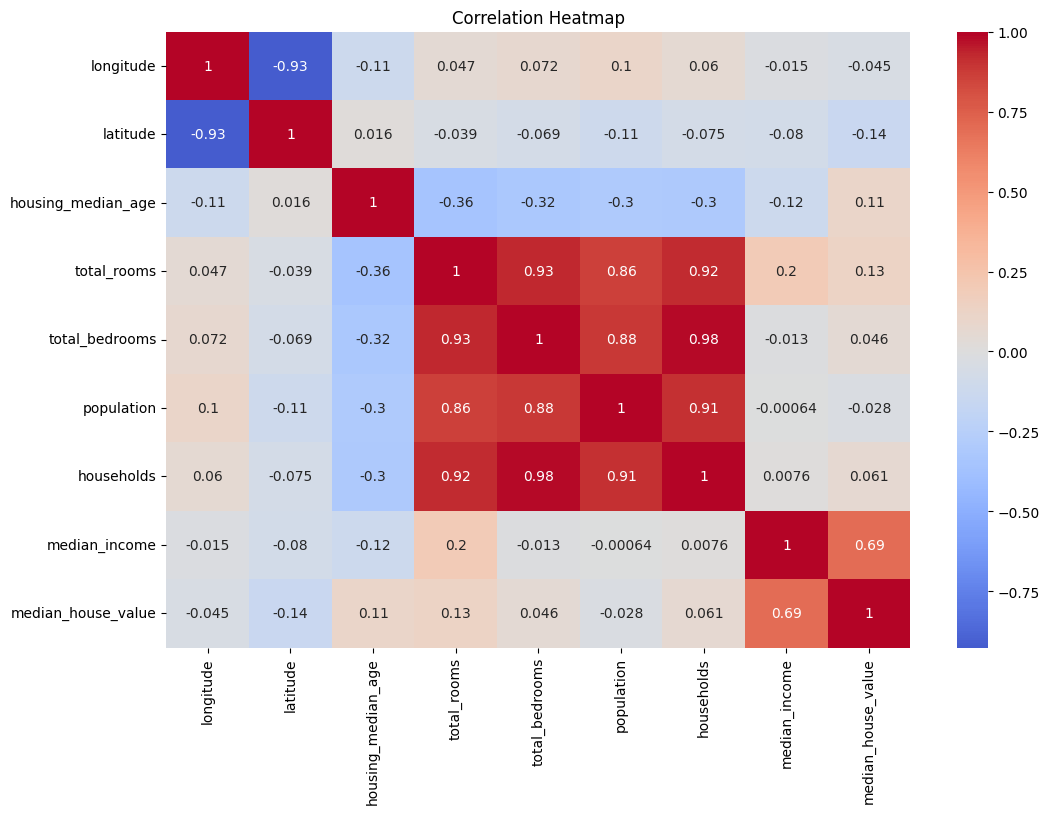

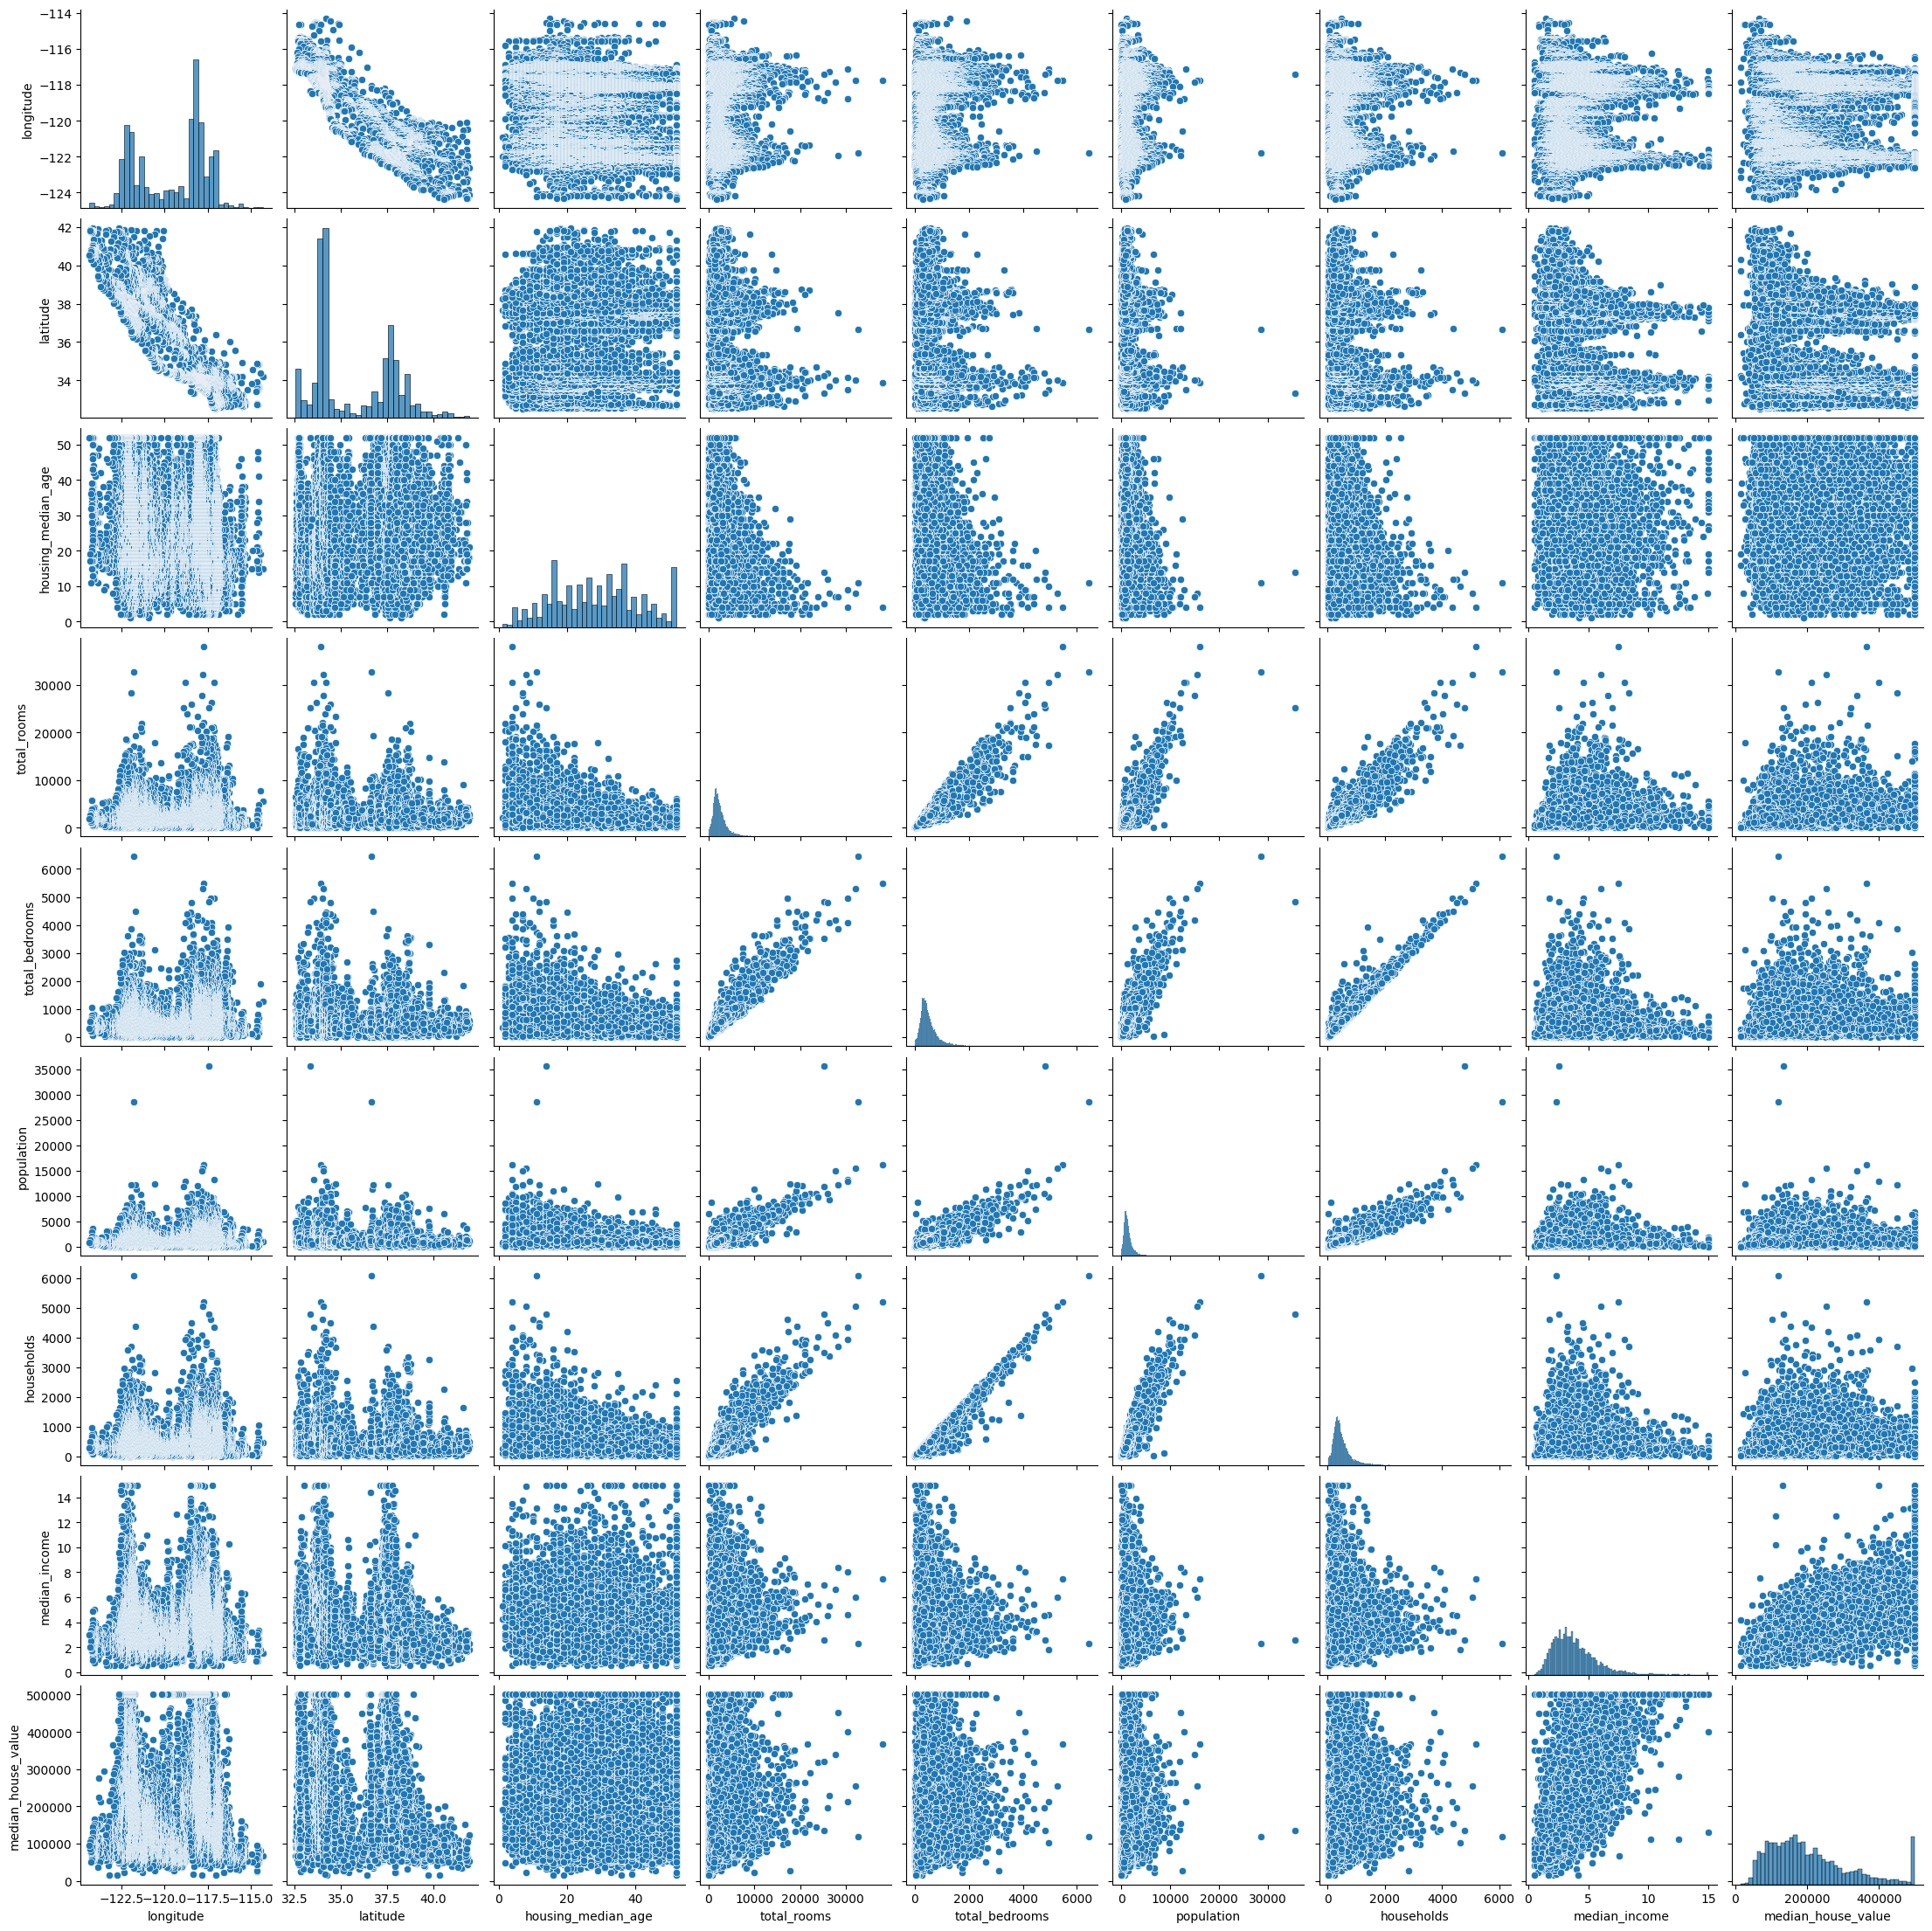

In [20]:
# create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# create a pairplot
sns.pairplot(df)
plt.show()


# Key Features to Use:

- median_income (strong correlation, positive)
- total_rooms (moderate correlation, positive)
- (moderate correlation, positive)
- latitude (weak inverse correlation, might still add some context)

In [26]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 38.5 MB/s eta 0:00:00 0:00:01


Mean Squared Error: 6188237376.3477745
R2 Score: 0.5508886308278665


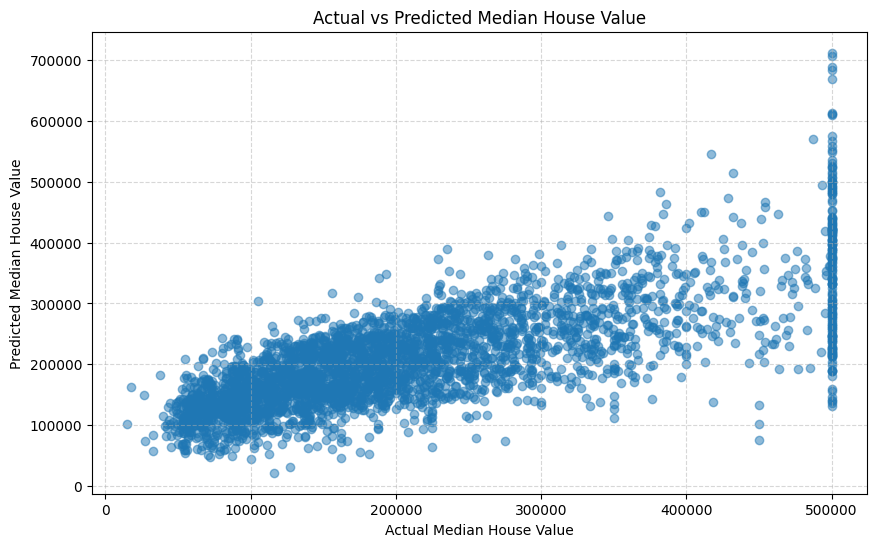

Text(0.5, 1.0, 'Residuals vs Actual Median House Value')

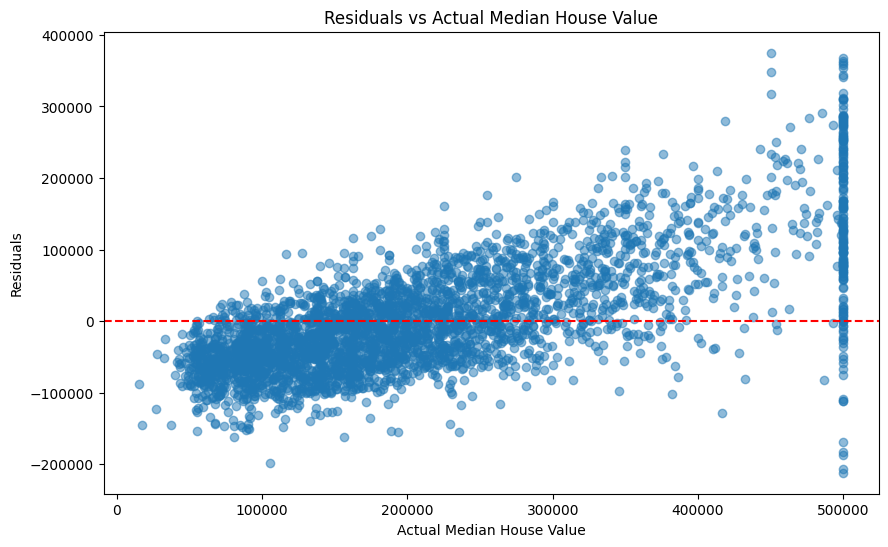

In [28]:
# key features to use on our model

# split the data into train and test
from sklearn.model_selection import train_test_split

# split the data into train and test
X = df[['median_income', 'total_rooms', 'housing_median_age', 'latitude']]
y = df['median_house_value']


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

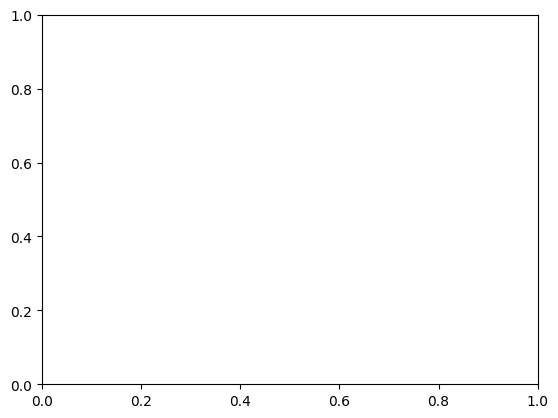

In [35]:
# histogram of the y_pred
plt.hist(y_pred, bins=30)
plt.show()

# histogram of the y_test
plt.hist(y_test, bins=30)
plt.show()

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# clean the data
df.dropna(inplace=True)
X = df[['median_income', 'total_rooms', 'housing_median_age', 'latitude']]
y = df['median_house_value']


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assume X_train, X_test, y_train, y_test are already defined
# If not, you need to load and preprocess your dataset here

# Set device to 'mps' if available, else fallback to 'cpu'
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Convert data to PyTorch tensors and move them to the device
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Create the model, move it to the device, define the loss function and optimizer
input_size = X_train_tensor.shape[1]
model = LinearRegressionModel(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))  # Ensure correct shape
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Optional: print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy().flatten()  # Flatten the array

# Convert y_test to NumPy array if necessary and flatten
y_test_np = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()

# Check for NaN or infinite values
if np.isnan(y_test_np).any() or np.isinf(y_test_np).any():
    print("Warning: y_test contains NaN or infinite values.")
if np.isnan(y_pred).any() or np.isinf(y_pred).any():
    print("Warning: y_pred contains NaN or infinite values.")

# Calculate MSE and R2 score
mse = mean_squared_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


ValueError: Input contains NaN.